In [2]:
from v2_module import *

In [3]:
# set qubits and gates
num_qubits = 5 # recommended at least 3. Default 5.
num_gates = 30 # recommended at least 10. Default 30.     In general, do more qubits and gates.
name_notes = "high_dim_test"
# GNN Network parameters
hidden_dim=7
num_layers=3
# REINFORCE parameters
gamma = .95
max_steps = 30
num_episodes = 1000
comparative = True
save_results = False
save_plots = save_results
lr = 1e-3

g = zx.generate.CNOT_HAD_PHASE_circuit(num_qubits, num_gates).to_graph()
env = ZXEnv(g, num_qubits, num_gates, MAX_STEPS=max_steps) # 5,20
policy_net = GCNPolicyNetwork(input_dim=12, hidden_dim=hidden_dim, output_dim=7, num_layers=num_layers) # do not change output_dim or input_dim!
optimizer = optim.Adam(policy_net.parameters(), lr=lr)
experiment_name = f"{name_notes}_{num_qubits}q_{num_gates}g"

results = reinforce(env, policy_net, optimizer, name=experiment_name, num_episodes=num_episodes, gamma=gamma, verbose=False, save_results=save_results, comparative=comparative)
if results:
    print("done.")

Episode: 999/1000 | Elapsed time: 0:03:30 | Estimated time to completion: 0:00:00

done.


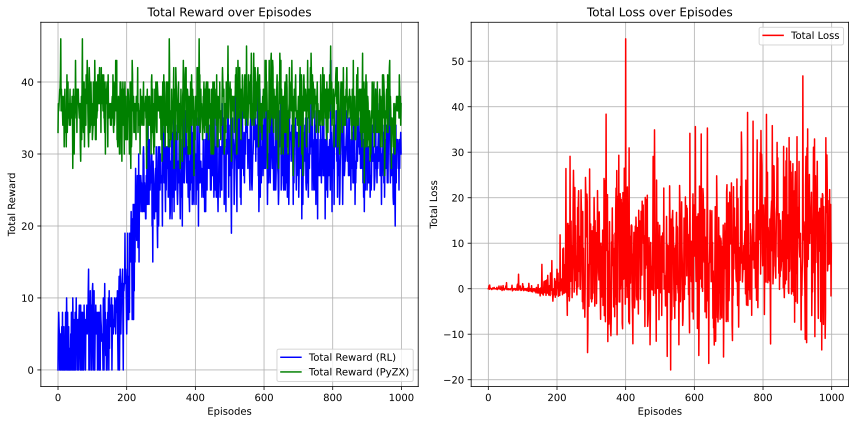

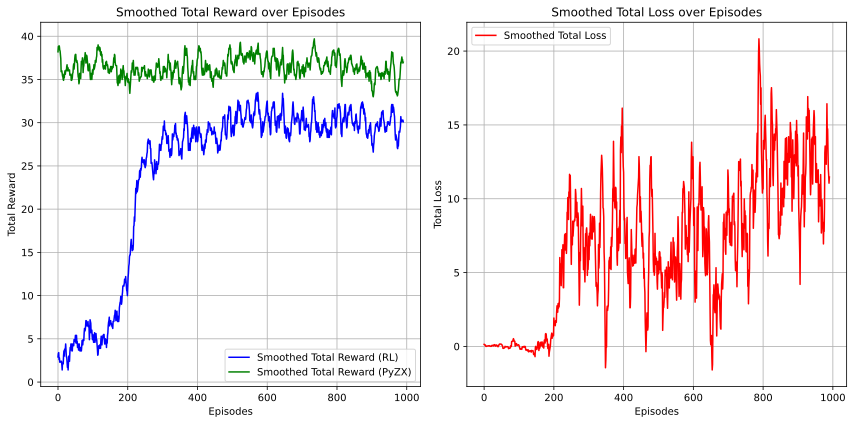

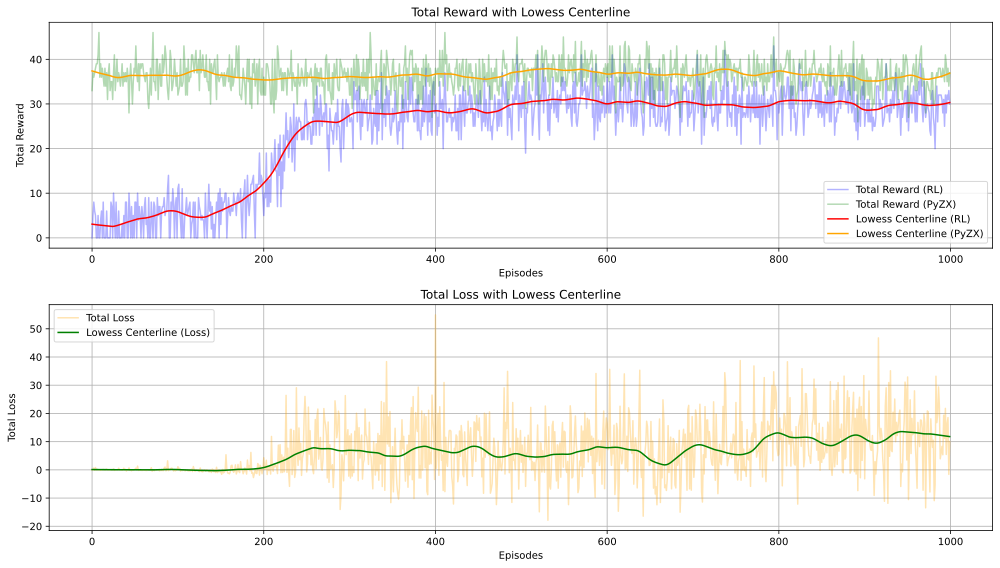

In [4]:
if not comparative:
    create_plots(results, experiment_name, verbose=True, save_plots=save_plots)
else:
    create_plots_comp(results[0], results[1], experiment_name, verbose=True, save_plots=save_plots)